## Implementación de una red neuronal para clasificación de números.

###Google Colab:
Tengo chunks de texto editable en formato Markdown y chunks de código. En este práctico usaremos Python.
Para ejecutar un trozo de código presiono el botón de Play y espero que aparezca un visto bueno verde.

In [ ]:
# Cargar librerías
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

Cargamos entonces el set de datos MNIST básico, de dígitos numéricos.

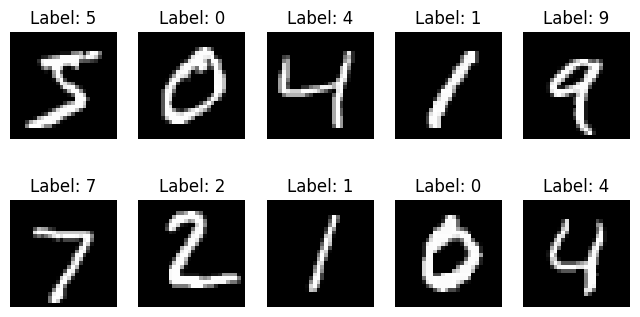

In [ ]:
# Cargar datos (60.000 imagenes, 60.000 etiquetas), (10.000 imagenes, 10.000 etiquetas)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Visualizar los primeros 5 elementos del conjunto de entrenamiento
plt.figure(figsize=(8, 4))
for i in range(5):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f'Label: {y_train[i]}')
  plt.axis('off')

# Visualizar los primeros 5 elementos del conjunto de prueba
for i in range(5):
  plt.subplot(2, 5, i + 6)
  plt.imshow(x_test[i], cmap='gray')
  plt.title(f'Label: {y_test[i]}')
  plt.axis('off')

plt.show()

Bien, ahora tenemos que normalizar los datos porque vienen en niveles digitales entre 0 y 255. Con esto estabilizo el procedimiento y no tengo problemas numéricos cuando tengo intervalos raros.

In [ ]:
# Normalizo los niveles digitales entre 0 y 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Bien, ahora tenemos que tomar estas matrices numéricas y aplanarlas para convertirlas a vectores.

In [ ]:
# Aplano las imágenes
x_train = x_train.reshape(-1, 28 * 28)  # Shape: (60000, 784)
x_test = x_test.reshape(-1, 28 * 28)    # Shape: (10000, 784)

# Chequeo...
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Definición de la red neuronal

Solamente usaremos dos capas densas como el ejemplo de ayer.
Usaremos Keras como ambiente constructor de la arquitectura de la red.

In [ ]:
# Defino el modelo
model = keras.Sequential([ # ojo con el paréntesis redondo y luego el cuadrado!
    layers.Dense(784, activation='relu', input_shape=(28 * 28,)),  # Input tiene que estar definido en primera capa
    layers.Dense(10, activation='softmax')  # capa de salida para 10 clases
])

# Chequeo...
print(model.summary())  # Wow!

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

None


Bien, ahora compilo el modelo y le asigno lo que quiero hacer con él. Elijo un optimizador, una función de pérdida y la(s) métrica(s) que quiero utilizar como objetivo del optimizador.

In [ ]:
# Compilo el modelo
model.compile(optimizer='adam',  # Adaptive Moment Estimation (Mejor que SGD: stochastic gradient descent)
              loss='sparse_categorical_crossentropy',  # Como ayer pero optimizado para variables categóricas
              metrics=['accuracy'])  # Basado en qué quiero optimizar

Ahora si! Puedo entrenar el modelo y ver si es una basura, o la maravilla más grande de mi vida. O algo entre medio...

In [ ]:
# Entreno el modelo
history = model.fit(x_train,
                    y_train,
                    epochs=5,  # hiperparámetro hiperimportante
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9058 - loss: 0.3206 - val_accuracy: 0.9644 - val_loss: 0.1083
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9769 - loss: 0.0784 - val_accuracy: 0.9748 - val_loss: 0.0836
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9858 - loss: 0.0456 - val_accuracy: 0.9762 - val_loss: 0.0768
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9895 - loss: 0.0332 - val_accuracy: 0.9794 - val_loss: 0.0702
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9920 - loss: 0.0245 - val_accuracy: 0.9779 - val_loss: 0.0781


Por último podemos evaluar el modelo de múltiples maneras. Primero cosas simples y estándar.

In [ ]:
# Evaluar el modelo calculando la precisión sobre el set de datos de validación
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.9779 - loss: 0.0781

Test accuracy: 0.9779000282287598


Hagamos un gráfico y vemos la precisión alcanzada en cada epoch.

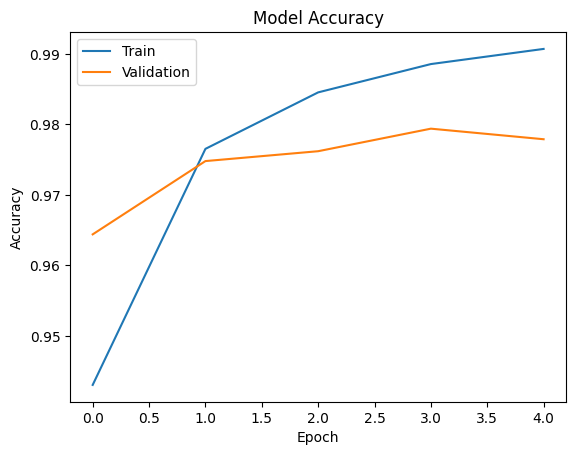

In [ ]:
# Grafico la precisión alcanzada
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Otra forma de ver los resultados y evaluar el modelo es prediciendo sobre datos del set de validación.

In [ ]:
# Realizo predicciones
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# chequeo...
print(predicted_labels.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
(10000,)


Hay mucho para mirar, así que voy a tomar una muestra aleatoria de 100 imágenes y las revisaré.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


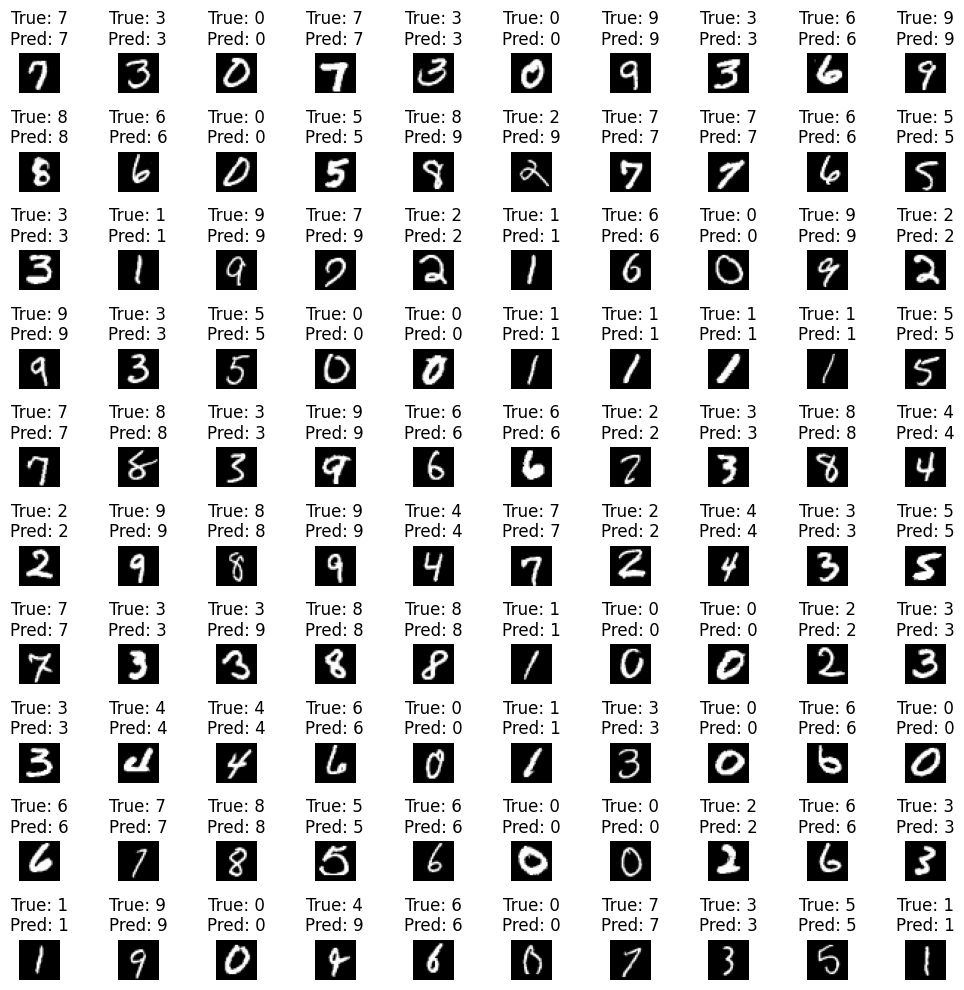

In [ ]:
# 100 muestras aleatorias
num_examples = 100
example_indices = np.random.choice(len(x_test),  # genero índices aleatorios
                                   num_examples,
                                   replace=False)
example_images = x_test[example_indices]  # indexo con mis índices aleatorios
example_labels = y_test[example_indices]

# Make predictions for the selected examples
predictions = model.predict(example_images)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the images in a grid with their original and predicted labels
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in range(num_examples):
    row = i // 10
    col = i % 10
    axes[row, col].imshow(example_images[i].reshape(28, 28), cmap='gray')
    axes[row, col].set_title(f"True: {example_labels[i]}\nPred: {predicted_labels[i]}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## Últimos pensamientos
Las entradas para una red neuronal en el contexto de Tensorflow podrían tener otros formatos (batch size, channels, height, width). Si tuvieramos datos de imágenes con más bandas, como por ejemplo las imágenes satelitáles o escáners cerebrales, esto podría ser bastante útil. Por esto es que ahora podría necesitar que nuestros datos tengan al menos 28 de ancho, 28 de alto y 1 canal, capa o banda.

In [ ]:
# Cargo nuevamente los datos
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalizo los niveles digitales entre 0 y 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Añado la dimensión capa
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Tamaño de x_train (batch size, width, height, channels):", x_train.shape)
print("Tamaño de x_test (batch size, width, height, channels):", x_test.shape)

Tamaño de x_train (batch size, width, height, channels): (60000, 28, 28, 1)
Tamaño de x_test (batch size, width, height, channels): (10000, 28, 28, 1)


Podría definir nuevas arquitecturas con capas que quisiera testear. Por ejemplo podría seguir los mismos pasos anteriores con la siguiente arquitectura.

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

None
